<a href="https://colab.research.google.com/github/Martipetti/MachineLearning/blob/develop-martipetti/Modelli/Rete%20Neurale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from itertools import product

Download the data

In [119]:
link = 'http://tennis-data.co.uk/2023/2023.xlsx'
totalData = pd.read_excel(link)

Removing null value

In [120]:
for column in totalData:
  totalData.dropna(subset=[column], inplace=True)

Cleaning DataSet

In [121]:
totalData = totalData[totalData['Series'] == 'Grand Slam']

In [122]:
trainingSet = totalData[["Tournament", "Surface", "Round", "Winner", "Loser", "WRank", "LRank", "B365W", "B365L", "PSW", "PSL"]]

In [123]:
trainingSet.reset_index(drop=True, inplace=True)
trainingSet.index = range(1, len(trainingSet) + 1)

In [124]:
nuovi_nomi_colonne = ["Tournament","Surface", "Round", "Player1", "Player2", "Rank1", "Rank2", "B1", "B2", "PS1", "PS2"]
trainingSet.columns = nuovi_nomi_colonne

In [125]:
trainingSet["target"] = 0

<ipython-input-125-60ba1f42b5c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["target"] = 0


Mapping string to integer

In [126]:
trainingSet["Tournament"] = trainingSet["Tournament"].astype("category")
trainingSet["Surface"] = trainingSet["Surface"].astype("category")
trainingSet["Round"] = trainingSet["Round"].astype("category")
trainingSet["Player1"] = trainingSet["Player1"].astype("category")
trainingSet["Player2"] = trainingSet["Player2"].astype("category")

<ipython-input-126-1d9e29e86b61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Tournament"] = trainingSet["Tournament"].astype("category")
<ipython-input-126-1d9e29e86b61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Surface"] = trainingSet["Surface"].astype("category")
<ipython-input-126-1d9e29e86b61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [127]:
trainingSet.dtypes

Tournament    category
Surface       category
Round         category
Player1       category
Player2       category
Rank1          float64
Rank2          float64
B1             float64
B2             float64
PS1            float64
PS2            float64
target           int64
dtype: object

In [128]:
label_encoder = LabelEncoder()
trainingSet["Tournament"] = label_encoder.fit_transform(trainingSet["Tournament"])
trainingSet["Surface"] = label_encoder.fit_transform(trainingSet["Surface"])
trainingSet["Round"] = label_encoder.fit_transform(trainingSet["Round"])

<ipython-input-128-be19e985f5d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Tournament"] = label_encoder.fit_transform(trainingSet["Tournament"])
<ipython-input-128-be19e985f5d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Surface"] = label_encoder.fit_transform(trainingSet["Surface"])
<ipython-input-128-be19e985f5d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [129]:
label_encoder = LabelEncoder()
label_encoder.fit(trainingSet["Player2"].append(trainingSet["Player1"]))
tmp_1 = label_encoder.transform(trainingSet["Player1"])
tmp_2 = label_encoder.transform(trainingSet["Player2"])
trainingSet["Player1Code"], trainingSet["Player2Code"] = tmp_1, tmp_2

<ipython-input-129-98cfb96ab1d4>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  label_encoder.fit(trainingSet["Player2"].append(trainingSet["Player1"]))
<ipython-input-129-98cfb96ab1d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Player1Code"], trainingSet["Player2Code"] = tmp_1, tmp_2
<ipython-input-129-98cfb96ab1d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Player1Code"], train

Mixing the player to avoid the pattern with the winner on the first columns and the loser on the second one

In [130]:
trainingSet

,Tournament,Surface,Round,Player1,Player2,Rank1,Rank2,B1,B2,PS1,PS2,target,Player1Code,Player2Code
1,0,2,0,Moutet C.,Wu Y.,62.0,114.0,2.38,1.57,2.40,1.65,0,64,106
2,0,2,0,Mcdonald M.,Nakashima B.,65.0,49.0,2.50,1.53,2.59,1.56,0,57,68
3,0,2,0,Millman J.,Huesler M.A.,140.0,51.0,2.20,1.67,2.25,1.72,0,59,41
4,0,2,0,Eubanks C.,Kwon S.W.,116.0,52.0,2.38,1.57,2.65,1.55,0,27,51
5,0,2,0,Fucsovics M.,Coria F.,78.0,76.0,1.14,5.50,1.17,5.96,0,31,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2,2,1,Mmoh M.,Isner J.,89.0,157.0,1.80,2.00,1.83,2.09,0,60,44
97,2,2,1,Arnaldi M.,Fils A.,61.0,48.0,2.30,1.62,2.54,1.58,0,2,28
98,2,2,2,Stricker D.,Bonzi B.,128.0,108.0,1.67,2.20,1.66,2.38,0,90,8
99,2,2,2,Djokovic N.,Djere L.,2.0,38.0,1.01,26.00,1.02,30.68,0,24,23


In [131]:
swap_rows = trainingSet.index[::2]

df_swapped = trainingSet.loc[swap_rows]
df_swapped['Player1Code'], df_swapped['Player2Code'] = df_swapped['Player2Code'], df_swapped['Player1Code']
df_swapped['target'] = 1
df_swapped['Rank1'], df_swapped['Rank2'] = df_swapped['Rank2'], df_swapped['Rank1']
df_swapped['B1'], df_swapped['B2'] = df_swapped['B2'], df_swapped['B1']
df_swapped['PS1'], df_swapped['PS2'] = df_swapped['PS2'], df_swapped['PS1']

trainingSet = pd.concat([trainingSet.loc[~trainingSet.index.isin(swap_rows)], df_swapped])

In [132]:
trainingSet = trainingSet.drop(["Player1", "Player2"], axis=1)

Scaling and splitting the data and rename the data set

In [133]:
trainingSet = shuffle(trainingSet)

In [134]:
X_train = trainingSet[trainingSet["Tournament"] != 3]
X_test = trainingSet[trainingSet["Tournament"] == 3]

In [135]:
y_train = X_train["target"]
y_test = X_test["target"]

In [136]:
X_train = X_train.drop(columns=["target"])
X_test = X_test.drop(columns=["target"])

In [137]:
standardScaler = StandardScaler()
X_train = pd.DataFrame(standardScaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(standardScaler.fit_transform(X_test), columns = X_test.columns)

In [138]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

Creating the neural network model

In [139]:
model = Sequential([
    Dense(units=56, input_shape=(11,), activation='relu'),
    Dense(units=112, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [140]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [141]:
model.fit(x=X_train, y=y_train, epochs=10, batch_size=50, verbose=1, validation_split=0.1)

Epoch 1/10
2/2 [==============================] - 1s 319ms/step - loss: 0.7368 - accuracy: 0.4648 - val_loss: 0.7622 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 0s 66ms/step - loss: 0.6974 - accuracy: 0.5211 - val_loss: 0.7610 - val_accuracy: 0.6250
Epoch 3/10
2/2 [==============================] - 0s 66ms/step - loss: 0.6774 - accuracy: 0.6056 - val_loss: 0.7664 - val_accuracy: 0.3750
Epoch 4/10
2/2 [==============================] - 0s 66ms/step - loss: 0.6622 - accuracy: 0.6197 - val_loss: 0.7696 - val_accuracy: 0.3750
Epoch 5/10
2/2 [==============================] - 0s 73ms/step - loss: 0.6499 - accuracy: 0.6197 - val_loss: 0.7666 - val_accuracy: 0.3750
Epoch 6/10
2/2 [==============================] - 0s 50ms/step - loss: 0.6392 - accuracy: 0.6338 - val_loss: 0.7614 - val_accuracy: 0.3750
Epoch 7/10
2/2 [==============================] - 0s 64ms/step - loss: 0.6293 - accuracy: 0.6761 - val_loss: 0.7561 - val_accuracy: 0.3750
Epoch 8/10
2/2 [==========

In [142]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 93ms/step


In [143]:
def correctValue(pred):
  for i in range(pred.shape[0]):
    value = pred[i]
    if (value[0]>value[1]):
      pred[i] = [1,0]
    else:
      pred[i] = [0,1]
  return pred

In [144]:
y_pred

array([[0.19893576, 0.8010642 ],
       [0.4221007 , 0.5778994 ],
       [0.5511284 , 0.4488716 ],
       [0.5106324 , 0.4893676 ],
       [0.49397475, 0.50602525],
       [0.47782218, 0.5221778 ],
       [0.529228  , 0.47077194],
       [0.5115026 , 0.48849726],
       [0.44041064, 0.55958945],
       [0.584496  , 0.41550392],
       [0.5048082 , 0.49519175],
       [0.4822589 , 0.517741  ],
       [0.38969636, 0.6103035 ],
       [0.5322138 , 0.46778622],
       [0.45608023, 0.54391974],
       [0.36757818, 0.63242185],
       [0.42606345, 0.5739366 ],
       [0.51822674, 0.48177326],
       [0.5472954 , 0.45270458],
       [0.51205   , 0.48795003],
       [0.4066555 , 0.5933445 ]], dtype=float32)

In [145]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6561774015426636
Test accuracy: 0.4761904776096344


In [146]:
score
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6561774015426636
Test accuracy: 0.4761904776096344


In [147]:
y_pred

array([[0.19893576, 0.8010642 ],
       [0.4221007 , 0.5778994 ],
       [0.5511284 , 0.4488716 ],
       [0.5106324 , 0.4893676 ],
       [0.49397475, 0.50602525],
       [0.47782218, 0.5221778 ],
       [0.529228  , 0.47077194],
       [0.5115026 , 0.48849726],
       [0.44041064, 0.55958945],
       [0.584496  , 0.41550392],
       [0.5048082 , 0.49519175],
       [0.4822589 , 0.517741  ],
       [0.38969636, 0.6103035 ],
       [0.5322138 , 0.46778622],
       [0.45608023, 0.54391974],
       [0.36757818, 0.63242185],
       [0.42606345, 0.5739366 ],
       [0.51822674, 0.48177326],
       [0.5472954 , 0.45270458],
       [0.51205   , 0.48795003],
       [0.4066555 , 0.5933445 ]], dtype=float32)

In [148]:
y_pred = correctPrediction(y_pred)

In [149]:
y_test_first = np.array([tmp[0] for tmp in y_test])

In [150]:
y_pred_first = np.array([tmp[0] for tmp in y_pred])

In [151]:
def firstValue(pred):
  return np.array([tmp[0] for tmp in pred])

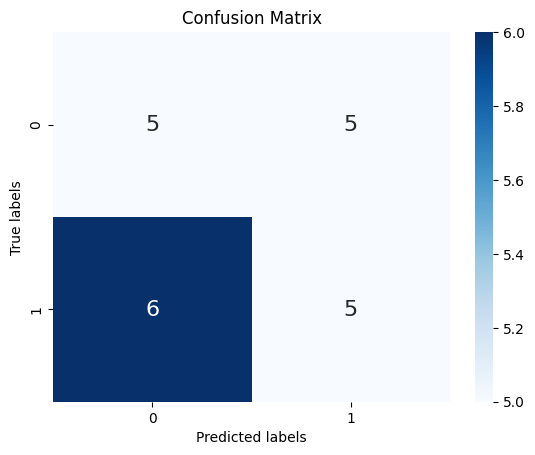

In [152]:
conf_matrix = confusion_matrix(y_test_first, y_pred_first, labels=None, sample_weight=None)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

# Define the neural network model
def create_model(optimizer='adam', loss='binary_crossentropy', firstLayer=11, secondLayer=11):
    model = Sequential()
    model.add(Dense(56, input_dim=11, activation='relu'))
    model.add(Dense(112, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model


# Define the hyperparameter grid
param_grid = {'batch_size': [10, 20, 40],
              'epochs': [10, 20, 40, 50, 100],
              'optimizer': ['adam', 'rmsprop'],
              'loss': ['binary_crossentropy','categorical_crossentropy', 'hinge'],
              'firstLayer': [11, 22, 32, 44],
              'secondLayer': [22, 44, 88]}


# Initialize the best accuracy and the best hyperparameters
best_accuracy = 0
best_params = {}

# Loop over the hyperparameter grid
for params in product(*param_grid.values()):
    # Create the neural network model with the current hyperparameters
    model = create_model(params[2], params[3], params[4], params[5])

    # Train the model
    model.fit(X_train, y_train, batch_size=params[0], epochs=params[1], verbose=0)

    # Evaluate the model on the testing set
    y_pred = model.predict(X_test)
    y_pred = correctValue(y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    print("Hyperparameters: ", best_params)
    print("Accuracy: ", best_accuracy)
    print("--------------------------------------")

    # Update the best accuracy and the best hyperparameters
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

# Print the best hyperparameters
print("Best hyperparameters: ", best_params)
print("Best accuracy: ", best_accuracy)

1/1 [==============================] - 0s 56ms/step
Hyperparameters:  {}
Accuracy:  0
--------------------------------------
1/1 [==============================] - 0s 58ms/step
Hyperparameters:  (10, 10, 'adam', 'binary_crossentropy', 11, 22)
Accuracy:  0.5714285714285714
--------------------------------------
1/1 [==============================] - 0s 68ms/step
Hyperparameters:  (10, 10, 'adam', 'binary_crossentropy', 11, 44)
Accuracy:  0.6190476190476191
--------------------------------------
1/1 [==============================] - 0s 61ms/step
Hyperparameters:  (10, 10, 'adam', 'binary_crossentropy', 11, 44)
Accuracy:  0.6190476190476191
--------------------------------------
1/1 [==============================] - 0s 59ms/step
Hyperparameters:  (10, 10, 'adam', 'binary_crossentropy', 11, 44)
Accuracy:  0.6190476190476191
--------------------------------------
1/1 [==============================] - 0s 57ms/step
Hyperparameters:  (10, 10, 'adam', 'binary_crossentropy', 22, 44)
Accuracy: